['0.9142', '0.0858']


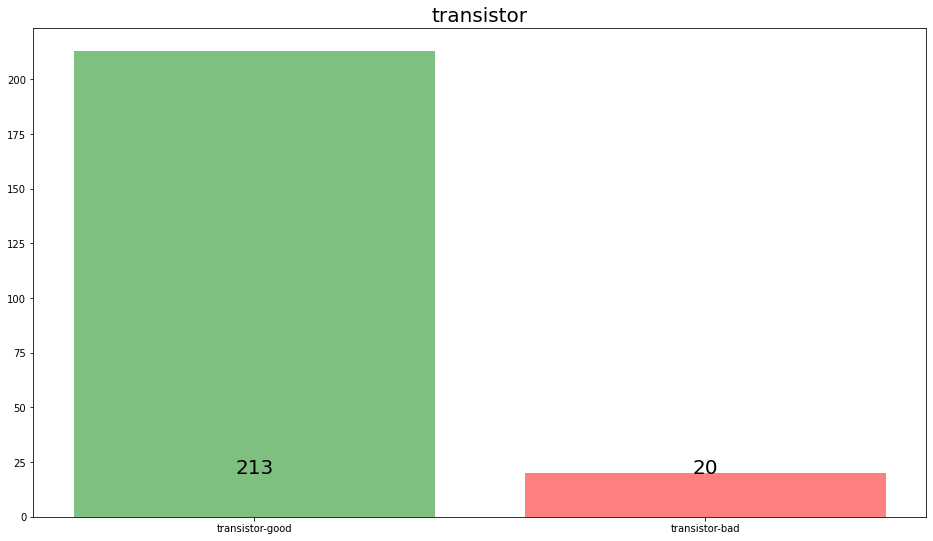

['0.7964', '0.2036']


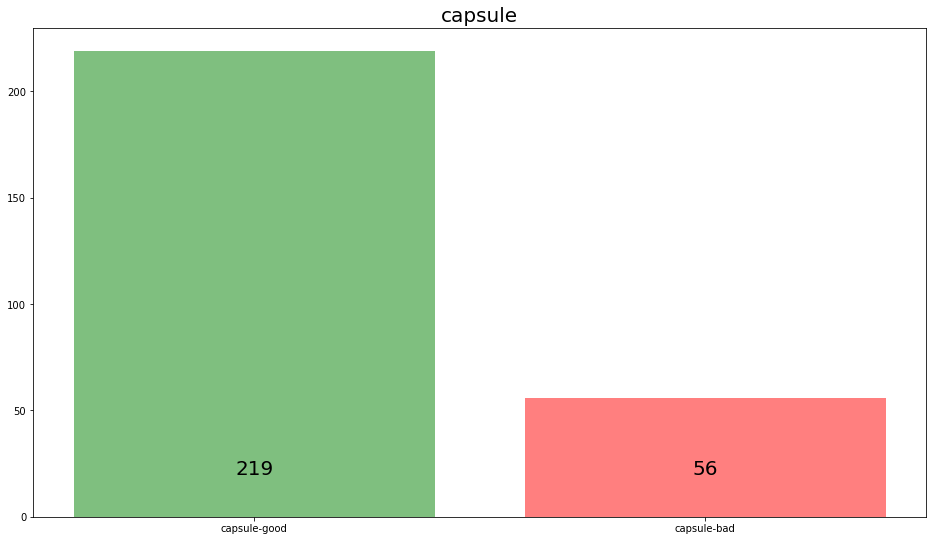

['0.8885', '0.1115']


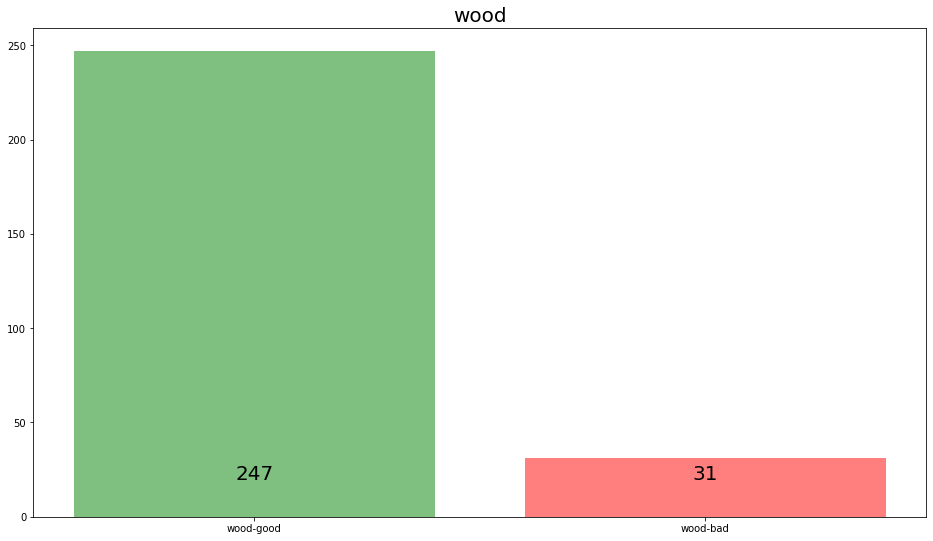

['0.8672', '0.1328']


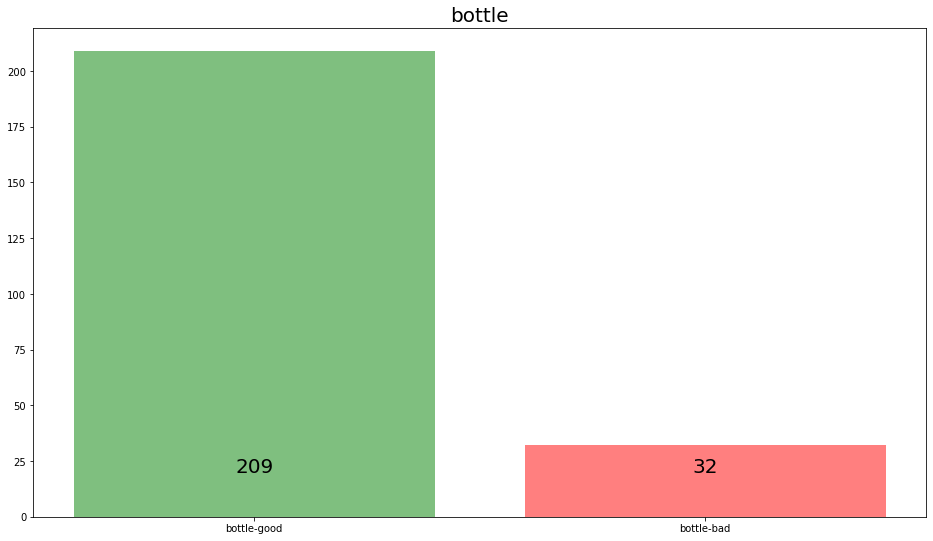

['0.8399', '0.1601']


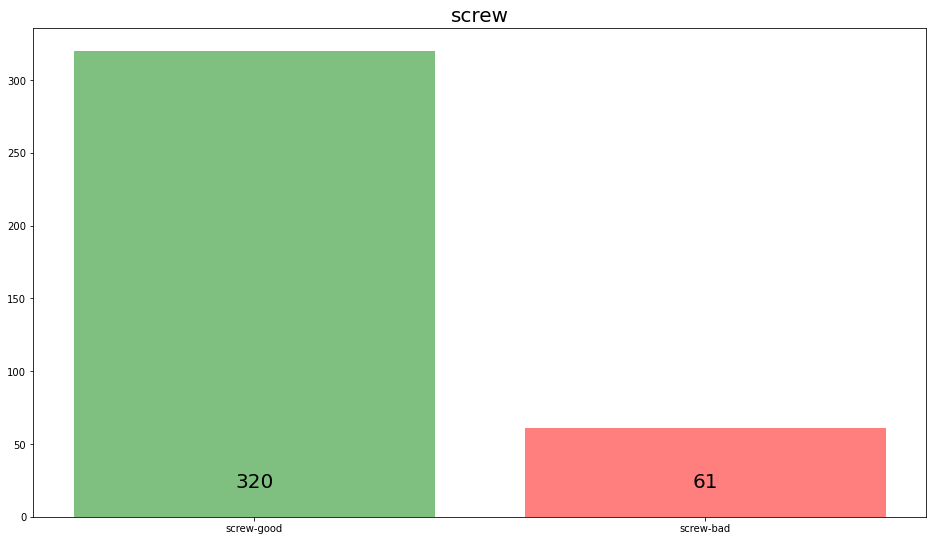

['0.8266', '0.1734']


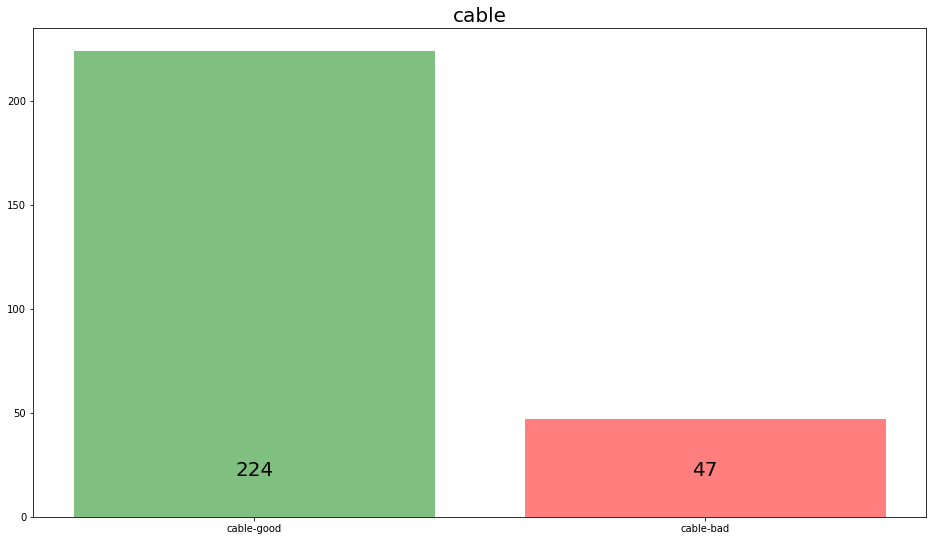

['0.8563', '0.1437']


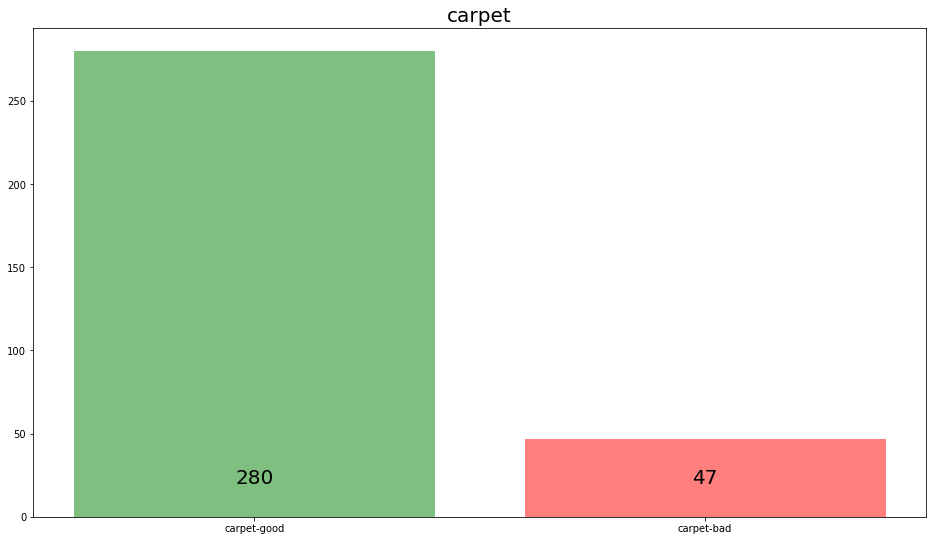

['0.9157', '0.0843']


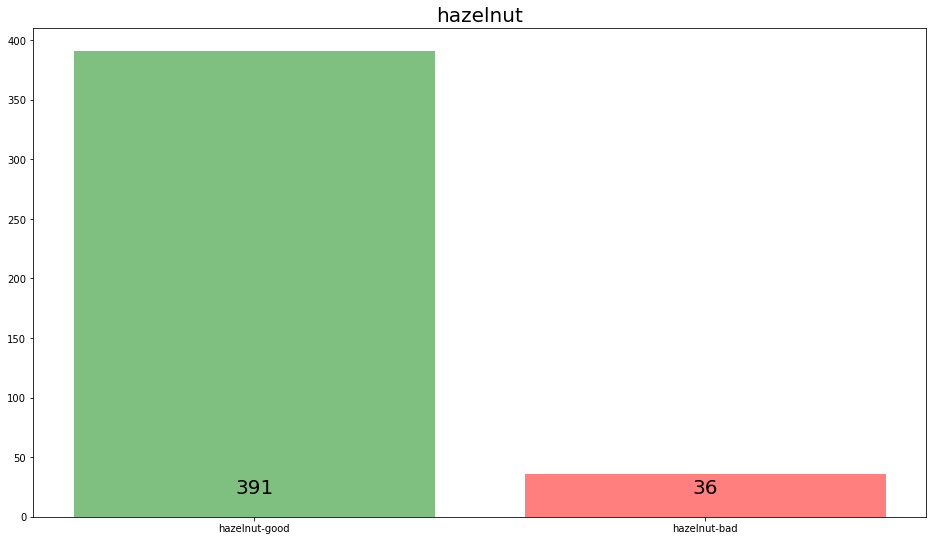

['0.7853', '0.2147']


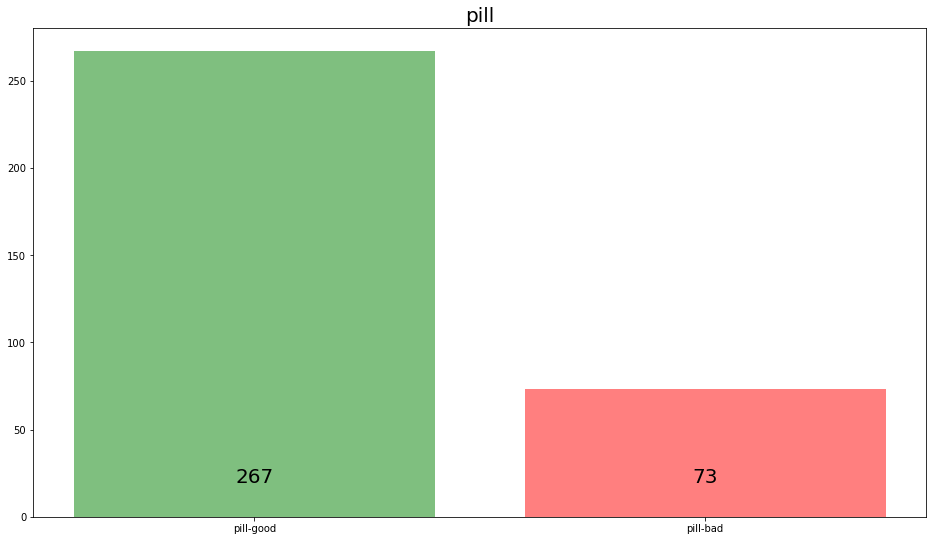

['0.8209', '0.1791']


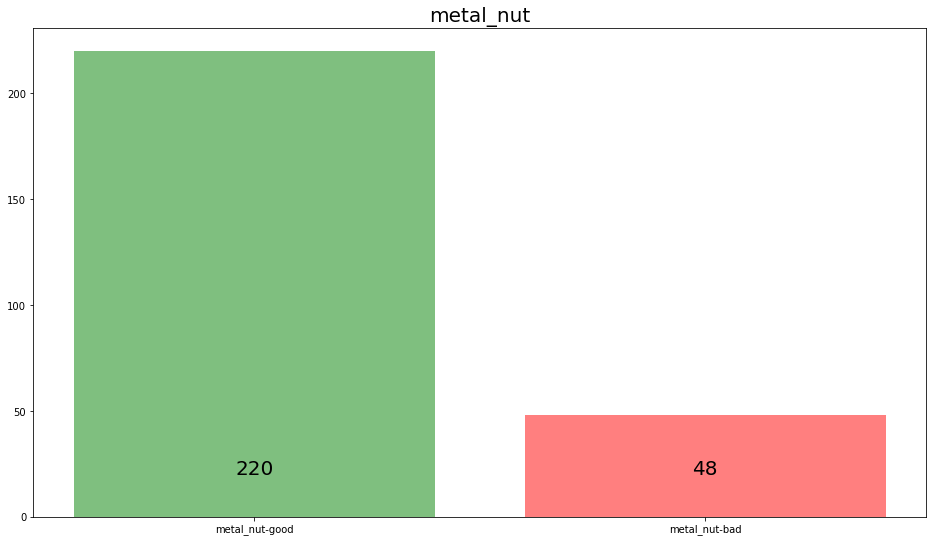

['0.7973', '0.2027']


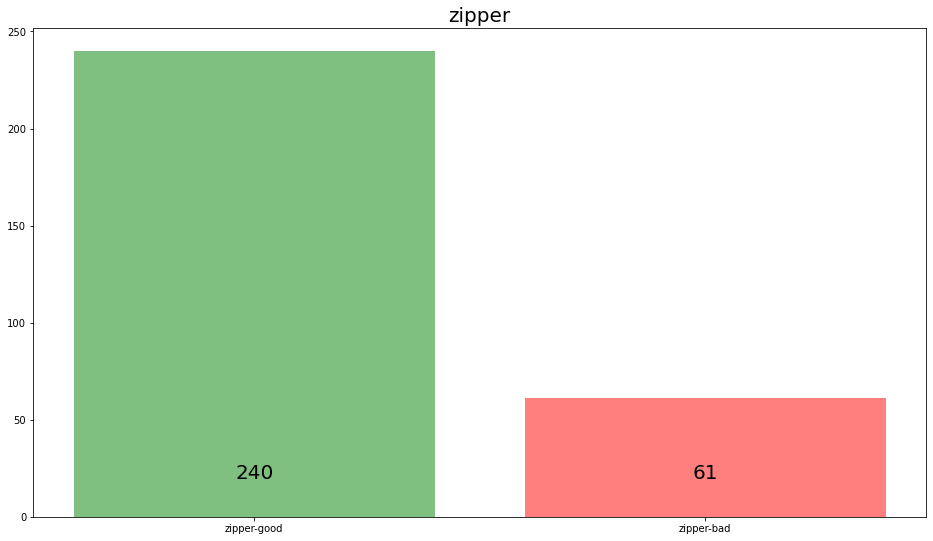

['0.8362', '0.1638']


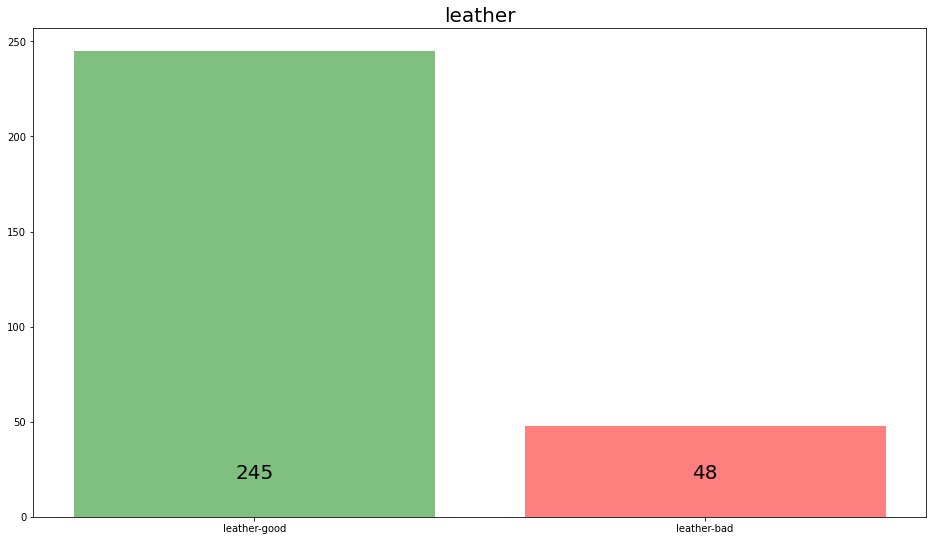

['0.8000', '0.2000']


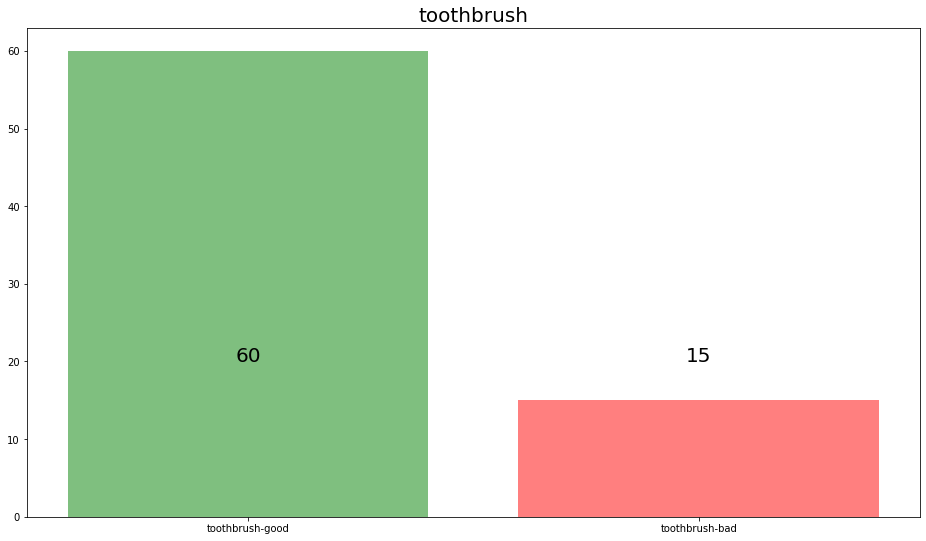

['0.8425', '0.1575']


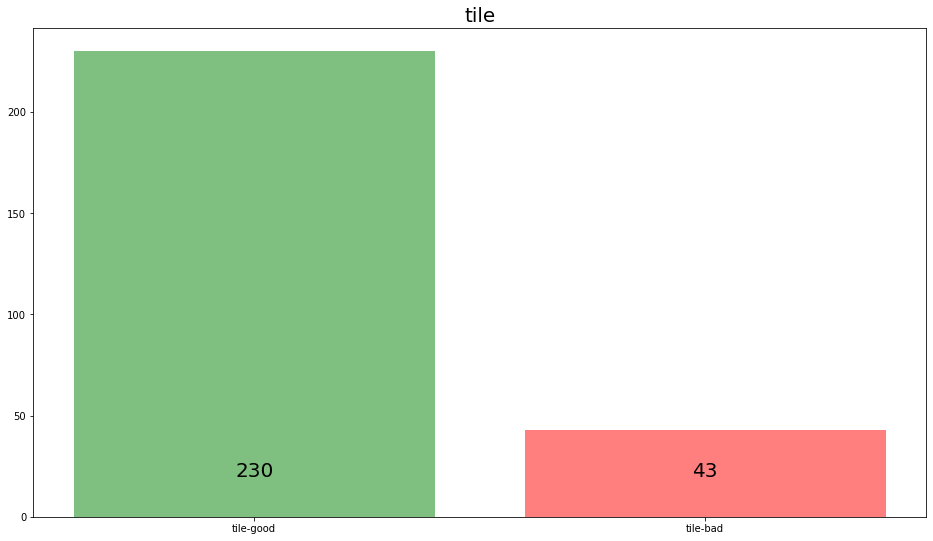

['0.8980', '0.1020']


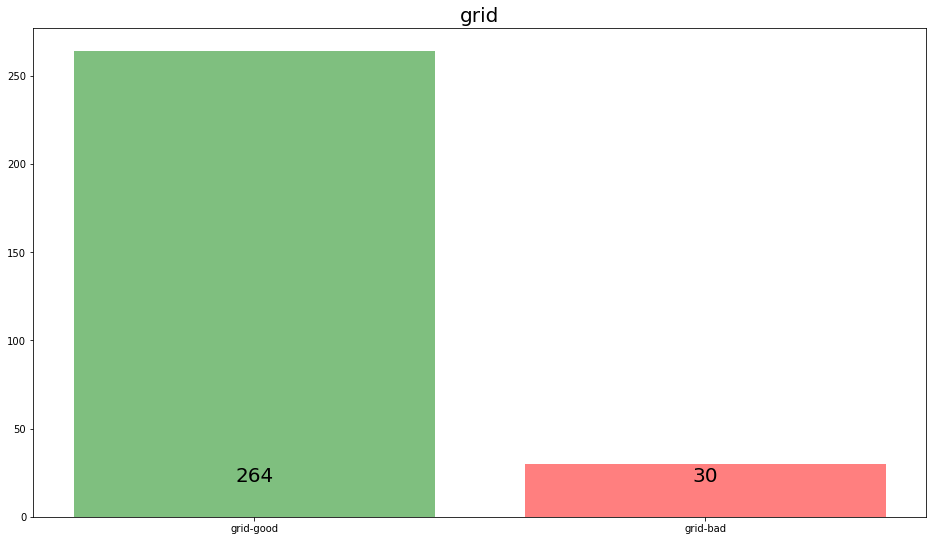

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import dataframe_image as dfi
from IPython.display import display

colors = ['tomato', 'wheat','orange', 'teal', 'gold', 
  'thistle', 'lime', 'magenta', 'cyan', 
 'tan', 'bisque',  'violet', 'coral', 'Olive', 'chocolate']

train_df = pd.read_csv('./open/train_df.csv', index_col=0)
train_df['good'] = [x if x.split('-')[1]=='good' else f"{x.split('-')[0]}-bad" for x in train_df['label']]

classList = train_df['class'].unique()
labelCount = train_df[['class', 'label']].groupby('label').count().rename(columns={'class': 'count'})
goodCount = train_df[['class', 'good']].groupby('good').count().rename(columns={'class': 'count'})

anomaly_dict = {}
# for className in classList:
#     df = pd.DataFrame(labelCount[labelCount.index.str.contains(className)]).sort_values(by='count', ascending=False)
#     anomaly_dict[className] = df
for className in classList:
    df = pd.DataFrame(goodCount[goodCount.index.str.contains(className)]).sort_values(by='count', ascending=False)
    anomaly_dict[className] = df

# fig, axs = plt.subplots(15, 1, figsize=(15, 15*5))
# fig.subplots_adjust(hspace = .3)
# axs = axs.ravel()

for i, (className, df) in enumerate(anomaly_dict.items()):
    colors = ['red' for i in range(len(df.index))]
    colors[0] = 'green'
    plt.figure(figsize=(16, 9))
    plt.bar(df.index, df.iloc[:, 0], color=colors, alpha=0.5)
    plt.title(className, fontsize=20)
    for j, value in enumerate(df.iloc[:, 0]):
        plt.text(j, 20, df.iloc[:, 0][j], ha='center', fontsize=20)
    plt.savefig(f'./good-{className}.png', bbox_inches='tight', pad_inches=0)
    print([f"{df.loc[index]['count']/sum(df['count']):.4f}" for index in df.index])
    plt.show()

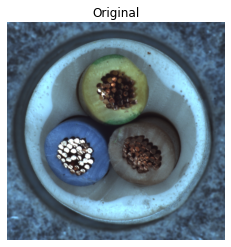

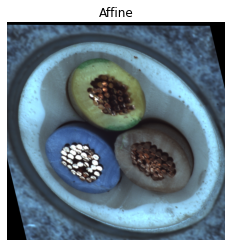

In [20]:
import albumentations as A
import cv2
import random
import matplotlib.pyplot as plt

A_list = {
    # 'NO': None,
    # 'Horizontal Flip': A.HorizontalFlip(p=1),
    'Affine': A.Affine(p=1),
    # 'Vertical Flip': A.VerticalFlip(p=1),
    # 'Both Flip': [A.HorizontalFlip(p=1), A.VerticalFlip(p=1)],
    # '80 Crop and Resize': [A.CenterCrop(int(512*0.8), int(512*0.8), p=1), A.Resize(512, 512, p=1)],
    # '85 Crop and Resize': [A.CenterCrop(int(512*0.8), int(512*0.8), p=1), A.Resize(512, 512, p=1)],
    # '90 Crop and Resize': [A.CenterCrop(int(512*0.9), int(512*0.9), p=1), A.Resize(512, 512, p=1)],
    # '95 Crop and Resize': [A.CenterCrop(int(512*0.95), int(512*0.95), p=1), A.Resize(512, 512, p=1)],
    # 'Random Rotate within 360': A.Rotate(limit=360, border_mode=cv2.BORDER_CONSTANT, value=0, p=1),
    # 'Random Shift within 12%': A.ShiftScaleRotate(shift_limit=0.12, scale_limit=0, rotate_limit=0, border_mode=cv2.BORDER_CONSTANT, value=0, p=1),
    # 'Random Scale within 20%': A.ShiftScaleRotate(shift_limit=0, scale_limit=0.2, rotate_limit=0, border_mode=cv2.BORDER_CONSTANT, value=0, p=1),
    # 'Random Scale and Shift': A.ShiftScaleRotate(shift_limit=0.12, scale_limit=0.2, rotate_limit=0, border_mode=cv2.BORDER_CONSTANT, value=0, p=1),
    # 'Random Shift and Rotate': A.ShiftScaleRotate(shift_limit=0.12, scale_limit=0, rotate_limit=360, border_mode=cv2.BORDER_CONSTANT, value=0, p=1),
    # 'Random Scale and Rotate': A.ShiftScaleRotate(shift_limit=0, scale_limit=0.2, rotate_limit=360, border_mode=cv2.BORDER_CONSTANT, value=0, p=1),
    # 'Random Scale, Shift, Rotate': A.ShiftScaleRotate(shift_limit=0.12, scale_limit=0.2, rotate_limit=360, border_mode=cv2.BORDER_CONSTANT, value=0, p=1),
    # 'Random Resized Crop': A.RandomResizedCrop(height=512, width=512, scale=(0.3, 1.0), p=1),
    # 'Gauss Noise': A.GaussNoise(p=1),
    # 'ISO Noise': A.ISONoise(p=1),
    # 'Grid Distortion': A.GridDistortion(p=1),
    # 'Perpective': A.Perspective(p=1),
    # 'Gaussian Blur': A.GaussianBlur(p=1),
    # 'Motion Blur': A.MotionBlur(p=1),
    # 'Image Compression': A.ImageCompression(p=1),
    # 'Color Jitter': A.ColorJitter(p=1),
    # 'Random Fog': A.RandomFog(p=1),
    # 'Random Gamma': A.RandomGamma(p=1),
    # 'Random Rain': A.RandomRain(p=1),
    # 'Random Shadow': A.RandomShadow(p=1),
    # 'Random Snow': A.RandomSnow(p=1),
    # 'Random Sun Flare': A.RandomSunFlare(p=1)
}

# y = cv2.imread(f"./open/train/{random.choice(list(range(10000, 14277)))}.png")
y = cv2.imread("./open/train/10032.png")
y = cv2.cvtColor(y, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.title("Original")
plt.imshow(y)
plt.savefig('./05.27.발표/original.png', bbox_inches='tight', pad_inches=0)
plt.show()

for key in A_list.keys():
    aug = A_list[key] if type(A_list[key])!=list else A.Compose(A_list[key])
    y90 = aug(image=y)['image']
    plt.axis('off')
    plt.title(key)
    plt.imshow(y90)
    plt.savefig(f'./05.27.발표/{key}.png', bbox_inches='tight', pad_inches=0)
    plt.show()

In [4]:
import torch
import numpy as np
import pandas as pd
import os

# for pth in [pth for pth in os.listdir('./others/MVtec_Ad-anomaly-detection/results') if pth.split('.')[1]=='pth']:
#     feat = torch.load(f'./others/MVtec_Ad-anomaly-detection/results/{pth}')
#     print(pth, feat.shape)
for pth in [pth for pth in os.listdir('./others/dacon-anomaly/files') if pth.split('.')[1]=='npy']:
    feat = np.load(f'./others/dacon-anomaly/files/{pth}', allow_pickle=True)
    print(pth, feat.shape)

effb4_bad_5fold.npy (2154, 30)
softmax_142.npy (2154, 88)
softmax_156.npy (2154, 88)
softmax_pillzip_266.npy (2154, 88)
softmax_pillzip_274.npy (2154, 88)
softmax_sy_123.npy (2154, 88)
softmax_sy_133.npy (2154, 88)
softmax_sy_266.npy (2154, 88)
softmax_sy_272.npy (2154, 88)
toothbrush_220.npy (54,)
toothbrush_221.npy (54,)
toothbrush_222.npy (54,)
zipper_254.npy (180,)
zipper_255.npy (180,)
zipper_256.npy (180,)
